# <center><span style="color:blue">Projet Data science</span></center>



<center>NOM</center>
<center>NOMP</center>
<center>NOMP</center>
<center>NOMP</center>



## <span style="color:red">  1. INTRODUCTION<span>

### <span style="color:green"> ***Présentation pour le 1er livrable*** </span>

**Contexte du Projet** : TouNum, une entreprise spécialisée dans la numérisation de documents, souhaite étendre ses services en intégrant des outils de Machine Learning pour aider ses clients à classer automatiquement leurs données numérisées. Le premier objectif est de développer une solution capable de distinguer les images qui ne sont pas des photos dans un dataset d’images variées.

**Objectif** : Créer une méthode de classification basée sur des réseaux de neurones pour distinguer les photos des autres types d'images (peintures, schémas, portraits, textes scannés). Cette solution permettra de faciliter la sélection automatique d’images pour des annotations futures.

**Étapes de Travail** :

Utilisation d'une architecture de réseau de neurones avec TensorFlow pour la classification d'images.
Construction d’un modèle de classification capable de distinguer les photos.
Analyse de la performance du modèle à travers des métriques comme l’accuracy et les courbes d’erreur d’entraînement/test.
Ajustement des hyperparamètres pour améliorer le compromis biais/variance, avec des techniques comme le *dropout*, *la régularisation* et *l’early stopping*.

**Livrable **: Un notebook Jupyter contenant :

* Le code TensorFlow et un schéma du réseau de neurones.
* Des graphiques montrant l'évolution de <span style="color:red">**l'accuracy**</span> et de <span style="color:red">**l'erreur**</span> .
* Une analyse du compromis biais/variance et des méthodes de régularisation.

## <span style="color:red">  2. ANALYSE DU BESOIN<span>

![AnalyseBesoinn.JPG](attachment:10e047cc-d3ae-4b1a-839f-5da971256bc5.JPG)

**À qui rend-il service ? :** Les principaux bénéficiaires sont les clients, entreprises ou individus, soumettant des photos pour traitement.

**Sur quoi agit-il ? :** Le système traite les photos soumises pour les légender ou les classer.

**Dans quel but ? :** L’objectif est de fournir un service automatisé de traitement d’images, incluant le nettoyage, la classification et la génération de légendes.

![ECD.JPG](attachment:af2c4abf-6114-4323-b151-7d244b5706e9.JPG)


**ECD, ou Extraction de Connaissances à partir des Données**, est un processus qui vise à extraire des informations utiles à partir de grandes quantités de données. Cela inclut la collecte, le prétraitement, l’extraction de motifs à l’aide d’algorithmes, l’interprétation des résultats et leur utilisation pour la prise de décision. L’entraînement de modèles de machine learning en fait partie, mais ECD couvre également d’autres étapes essentielles.

## <span style="color:red">  3. REALISATION DU PROJET<span>

**TensorFlow** : Bibliothèque pour créer et entraîner des modèles de machine learning et deep learning.

**Keras** : Interface haut niveau de TensorFlow pour construire des réseaux de neurones de manière simple.

**Matplotlib** : Bibliothèque pour visualiser des données sous forme de graphiques.

**NumPy**: Outil pour effectuer des calculs numériques avec des tableaux et matrices.

# Importation des bibliothèques nécessaires et vérification de la version de TensorFlow
Cette cellule importe toutes les bibliothèques nécessaires pour la création et l'entraînement du modèle de classification d'images. Elle vérifie également que la version de TensorFlow est bien la version 2.x.

In [16]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Ensure the TensorFlow version is 2.x
print(f'TensorFlow Version: {tf.__version__}')


TensorFlow Version: 2.17.0


# Chargement des données et préparation du dataset
Dans cette cellule, le dataset est chargé à partir d'un répertoire spécifié. Il est divisé en deux parties : *80%* pour l'entraînement et *20%* pour la validation. Les images sont redimensionnées à *64x64 pixels* et un `batch_size` de *8* est utilisé.


In [17]:
# Chemin vers votre répertoire de données
data_dir = './binary_dataset'

# Parameters
batch_size = 8  # Réduction de la taille du lot pour économiser la mémoire
image_size = (64, 64)  # Taille des images réduite pour économiser la mémoire
validation_split = 0.2  # 20% des données utilisées pour la validation
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Load train dataset with 80% of the data
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

# Load validation dataset with 20% of the data
validation_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

# Obtenez les noms des classes avant d'appliquer cache() et prefetch()
class_names = train_dataset.class_names
print("Classes:", class_names)


Found 31399 files belonging to 2 classes.
Using 25120 files for training.
Found 31399 files belonging to 2 classes.
Using 6279 files for validation.
Classes: ['Non-Photos', 'Photos']


# Vérification des premiers batchs et labels
Cette cellule vérifie les classes détectées dans le dataset et affiche les labels du premier lot d'images pour s'assurer que les données sont correctement chargées et étiquetées.


In [18]:
# Vérifier les classes détectées
print(f"Classes détectées: {class_names}")

# Vérifier les premiers batchs pour confirmer les labels
for images, labels in train_dataset.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels: {labels.numpy()}")


Classes détectées: ['Non-Photos', 'Photos']
Images shape: (8, 64, 64, 3)
Labels: [1 0 0 0 0 1 0 1]


# Optimisation de la performance avec `cache()` et `prefetch()`
Dans cette cellule, les datasets sont optimisés pour l'entraînement en utilisant des méthodes comme `cache()` et `prefetch()` pour améliorer les performances et réduire les temps de chargement.


In [19]:
# Optimize performance with caching and prefetching
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)


# Construction du modèle de réseau de neurones
Cette cellule définit l'architecture du modèle de réseau de neurones avec des couches convolutives, une couche de pooling, une couche dense, et du *dropout* pour éviter le surapprentissage (*overfitting*).


### MODELE 1 : BASIC
Dans ce modele, nous avons commencé avec deux couches convolutives, avec aucune technique pour éviter le surapprentissage.

In [20]:
# Construction du modèle N°1
model1 = Sequential([
    tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),  # Utilisation de la nouvelle taille d'image
    tf.keras.layers.Rescaling(1./255),  # Normalisation des pixels
    Conv2D(16, (3, 3), activation='relu'),  # Convolution layer avec 16 filtres
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),  # Convolution layer avec 16 filtres
    MaxPooling2D((2, 2)),  # Pooling layer
    Flatten(),  # Conversion en vecteur
    Dense(32, activation='relu'),  # Fully connected layer avec 32 neurones
    Dense(1, activation='sigmoid')  # Sortie binaire
])


c:\Users\kilyion\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Entraînement du modèle
history = model1.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=7
)

### MODELE 2 : AJOUT DROPOUT
Dans cette amélioration nous avons ajouté une couche de Dropout, elle permet de desactiver pendant l'entrainement un taux défini de neuronnes,ce qui permet d'éviter le sur-apprentissage.


In [ ]:
# Construction du modèle N°2
model2 = Sequential([
    tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),  # Utilisation de la nouvelle taille d'image
    tf.keras.layers.Rescaling(1./255),  # Normalisation des pixels
    Conv2D(16, (3, 3), activation='relu'),  # Convolution layer avec 16 filtres
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),  # Convolution layer avec 16 filtres
    MaxPooling2D((2, 2)),  # Pooling layer
    Flatten(),  # Conversion en vecteur
    Dense(32, activation='relu'),  # Fully connected layer avec 32 neurones
    Dropout(0.3),  # Dropout modéré pour éviter l'overfitting
    Dense(1, activation='sigmoid')  # Sortie binaire
])


c:\Users\kilyion\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Entraînement du modèle
history = model2.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=7
    
)

### MODELE 3 : SIMPLIFICATION DU MODELE
Enfin, voici le modèle finale un peu simplifié pour mieux apprendre selon notre Datasets, nous avons ajouté des techniques pour mieux apprendre aussi dans le fit, avec un ajout de poids de classes, ce qui permet que les données d'entrainement sois mieux équilibré, il y a aussi l'ajout d'un callback qui fait en sortes de sortir les meilleurs poids de modèle et l'arrété si il y a trop de fluctuations.

In [ ]:
# Construction du modèle N°3
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),  # Utilisation de la nouvelle taille d'image
    tf.keras.layers.Rescaling(1./255),  # Normalisation des pixels
    Conv2D(16, (3, 3), activation='relu'),  # Convolution layer avec 16 filtres
    MaxPooling2D((2, 2)),  # Pooling layer
    Flatten(),  # Conversion en vecteur
    Dense(32, activation='relu'),  # Fully connected layer avec 32 neurones
    Dropout(0.3),  # Dropout modéré pour éviter l'overfitting
    Dense(1, activation='sigmoid')  # Sortie binaire
])


c:\Users\kilyion\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


# Compilation et configuration du modèle
Dans cette cellule, le modèle est compilé avec l'optimiseur *Adam* et une fonction de perte `binary_crossentropy`. Les métriques d'*accuracy* sont également spécifiées.


In [21]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


# Définition de l'early stopping et ajustement des poids des classes
Cette cellule configure l'*early stopping* pour arrêter l'entraînement si la performance ne s'améliore pas après 2 epochs. Elle ajuste également la pondération des classes pour équilibrer les données si elles sont déséquilibrées.


In [22]:
# Définir l'early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,  # Arrêter l'entraînement après 2 epochs sans amélioration
    restore_best_weights=True
)

# Ajuster la pondération des classes si elles sont déséquilibrées
class_weight = {0: 1., 1: 3.}  # Modifier les poids en fonction de la répartition des classes


# Entraînement du modèle
Dans cette cellule, le modèle est entraîné avec le dataset de formation et de validation. Le mécanisme d'*early stopping* et la pondération des classes sont utilisés pour améliorer les résultats.


In [23]:
# Entraînement du modèle
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=7,
    class_weight=class_weight,  # Utilisation de la pondération des classes
    callbacks=[early_stopping]
)


Epoch 1/7
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8542 - loss: 0.5245 - val_accuracy: 0.9229 - val_loss: 0.1800
Epoch 2/7
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9156 - loss: 0.3085 - val_accuracy: 0.9334 - val_loss: 0.1657
Epoch 3/7
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9274 - loss: 0.2536 - val_accuracy: 0.9357 - val_loss: 0.1480
Epoch 4/7
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9331 - loss: 0.2205 - val_accuracy: 0.9471 - val_loss: 0.1303
Epoch 5/7
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9396 - loss: 0.1913 - val_accuracy: 0.9517 - val_loss: 0.1102
Epoch 6/7
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9452 - loss: 0.1736 - val_accuracy: 0.9537 - val_loss: 0.1087
Epoch 7/7
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9496 - loss: 0.1578 - val_accuracy: 0.9578 - val_loss: 0.0999


# Évaluation du modèle
Cette cellule évalue le modèle sur le dataset de validation et affiche l'accuracy et la perte après l'entraînement.


In [24]:
# Évaluation du modèle
loss, accuracy = model.evaluate(validation_dataset, verbose=2)
print(f'\nTest accuracy: {accuracy:.2f}')


785/785 - 1s - 1ms/step - accuracy: 0.9578 - loss: 0.0999

Test accuracy: 0.96


# Affichage des courbes d'entraînement et de validation
Cette cellule génère des graphiques montrant l'évolution de l'accuracy et de la perte pour l'ensemble d'entraînement et de validation au fil des epochs.


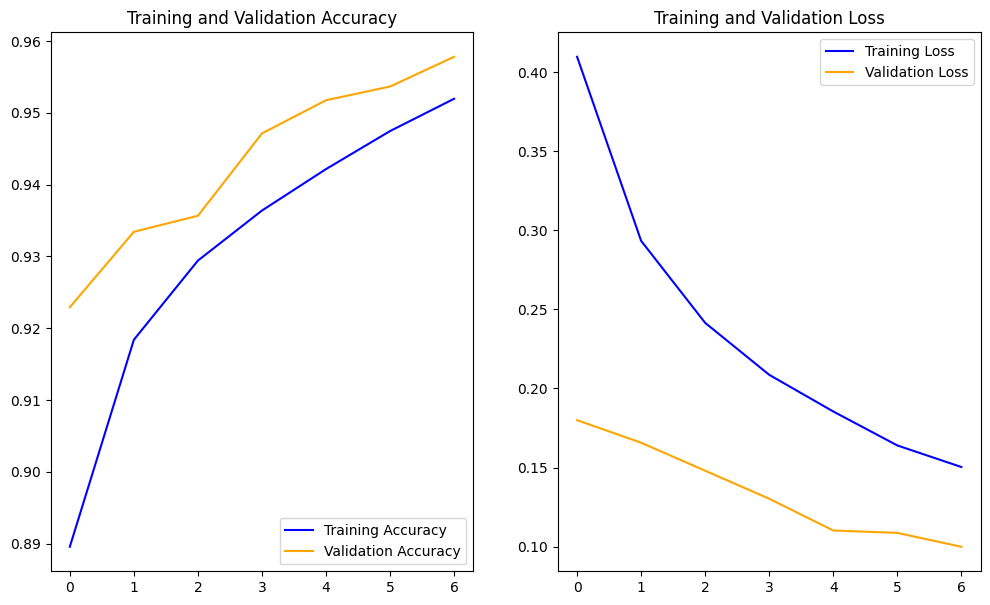

In [25]:
# Affichage des courbes d'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 7))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')  # Set color for training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')  # Set color for validation accuracy
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='blue')  # Set the same color as training accuracy
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')  # Set the same color as validation accuracy
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


# Matrice de confusion







785/785 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


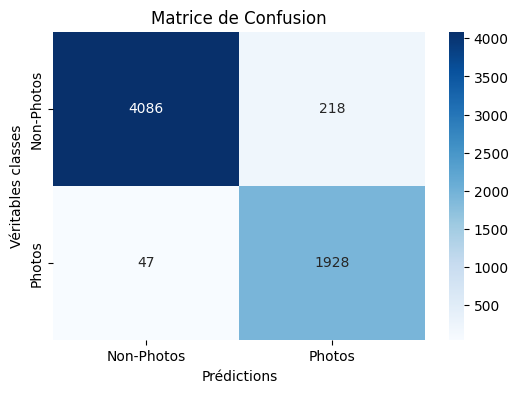

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = np.concatenate([y for x, y in validation_dataset], axis=0)
y_pred = model.predict(validation_dataset)
y_pred_classes = (y_pred > 0.5).astype("int32")

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prédictions')
plt.ylabel('Véritables classes')
plt.title('Matrice de Confusion')
plt.show()


# Sauvegarde du modèle
Cette cellule sauvegarde le modèle entraîné au format `.keras` pour une utilisation future.







In [26]:
# Sauvegarde du modèle
model.save('model_opti.keras')
